In [163]:
import cPickle as pickle
from sigvisa.infer.run_mcmc import run_open_world_MH
from sigvisa.infer.mcmc_logger import MCMCLogger

In [164]:
with open('/home/dmoore/python/sigvisa/logs/mcmc/01874/step_001509/pickle.sg', 'rb') as f:
    sg = pickle.load(f)

In [165]:
from sigvisa.infer.template_xc import *

In [166]:
wn = sg.station_waves['AS12'][11]
eid=12
phase="P"
tmnodes = sg.get_template_nodes(eid, wn.sta, phase, wn.band, wn.chan)

In [167]:
wn_target = wn
eid_target = eid

k_atime, n_atime = tmnodes['arrival_time']
current_atime = n_atime.get_value(key=k_atime)

relevant_nodes = [wn_target,]
relevant_nodes += [n_atime.parents[n_atime.default_parent_key()],] if n_atime.deterministic() else [n_atime,]

eid_src, wn_src = sample_xc_source_arrival(sg, eid_target, phase, wn_target.sta, wn_target.band, wn_target.chan)
source_v, _ = wn_src.get_template_params_for_arrival(eid_src, phase)

xcdist, idx_to_atime, atime_to_idx = atime_proposal_distribution_from_xc(sg, eid_src, eid_target, phase, wn_src, wn_target, temp=20.0)

proposed_idx = np.random.choice(np.arange(len(xcdist)), p=xcdist)

proposed_atime = idx_to_atime(proposed_idx)

log_qforward = np.log(xcdist[proposed_idx])
backwards_idx = atime_to_idx(current_atime)

log_qbackward = np.log(xcdist[backwards_idx])

22
1241531244.75 1241531247.96 -2.1149905832 -4.64191795388


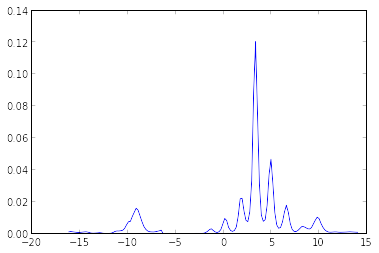

In [168]:
print eid_src
print current_atime, proposed_atime, log_qforward, log_qbackward

x0 = np.linspace(idx_to_atime(0)-current_atime, idx_to_atime(len(xcdist))-current_atime, len(xcdist))
plot(x0, xcdist)

In [169]:
k_coda_height, n_coda_height = tmnodes['coda_height']
k_pdecay, n_pdecay = tmnodes['peak_decay']
k_cdecay, n_cdecay = tmnodes['coda_decay']
cdecay = n_cdecay.get_value(key=k_cdecay)
pdecay = n_pdecay.get_value(key=k_pdecay)

k_offset, n_offset = tmnodes['peak_offset']

current_offset = n_offset.get_value(key=k_offset)
current_peak = current_atime + np.exp(current_offset)
current_height = n_coda_height.get_value(key=k_coda_height)



source_offset = source_v['peak_offset']
from sigvisa.models.distributions import Gaussian
offset_proposal_dist = Gaussian(source_offset, 0.1)

proposed_offset = offset_proposal_dist.sample()

In [170]:
print np.exp(current_offset), np.exp(source_offset), np.exp(proposed_offset)

20.450555563 1.56323018265 1.55529258785


(1241531234.7484064, 1241531274.7484064)

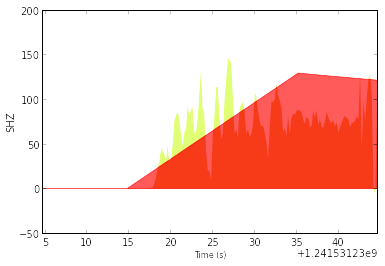

In [171]:
from sigvisa.plotting.plot import plot_with_fit_shapes
plot_with_fit_shapes(fname=None, wn=wn, axes=gca(), plot_wave=False, model_lw=0, ev_lw=0, plot_pred=True)
gca().set_xlim([current_atime-10, current_atime+30])

In [172]:
print sg.current_log_p()
print wn.upwards_message_normalizer()
print np.sum([jgp.log_likelihood() for jgp in wn.wavelet_param_models[phase]])

-344976.204702
-7578.48017038
740.202770025


In [173]:
offset_shift = np.exp(proposed_offset) - np.exp(current_offset)
amp_change = -np.exp(cdecay) * offset_shift
proposed_height = current_height + amp_change
print current_height, proposed_height

4.86323704455 4.98671433708


In [174]:
n_atime.set_value(proposed_atime)
n_coda_height.set_value(proposed_height)
n_offset.set_value(proposed_offset)

In [175]:
print sg.current_log_p()
print wn.upwards_message_normalizer()
print np.sum([jgp.log_likelihood() for jgp in wn.wavelet_param_models[phase]])

-345069.887644
-7284.61983598
348.177411083


In [177]:
for jgp in wn.wavelet_param_models[phase]:
    print jgp.param, jgp.log_likelihood()

db4uvars_2.0_3_10.0_0.4_0 1.16213230399e-05
db4uvars_2.0_3_10.0_0.4_1 0.0075714151597
db4uvars_2.0_3_10.0_0.4_2 -0.000163858781178
db4uvars_2.0_3_10.0_0.4_3 1.76697691287
db4uvars_2.0_3_10.0_0.4_4 0.0353777649107
db4uvars_2.0_3_10.0_0.4_5 14.9241669454
db4uvars_2.0_3_10.0_0.4_6 0.613045978601
db4uvars_2.0_3_10.0_0.4_7 8.74780891379
db4uvars_2.0_3_10.0_0.4_8 8.72744974083
db4uvars_2.0_3_10.0_0.4_9 -4.06534322535
db4uvars_2.0_3_10.0_0.4_10 5.94598759034
db4uvars_2.0_3_10.0_0.4_11 28.6023027992
db4uvars_2.0_3_10.0_0.4_12 27.6328824372
db4uvars_2.0_3_10.0_0.4_13 112.669583572
db4uvars_2.0_3_10.0_0.4_14 19.8263655041
db4uvars_2.0_3_10.0_0.4_15 30.1606789422
db4uvars_2.0_3_10.0_0.4_16 -32.9234571431
db4uvars_2.0_3_10.0_0.4_17 54.0504498572
db4uvars_2.0_3_10.0_0.4_18 -50.3992506329
db4uvars_2.0_3_10.0_0.4_19 23.5652557124
db4uvars_2.0_3_10.0_0.4_20 -15.0121638183
db4uvars_2.0_3_10.0_0.4_21 31.0083358609
db4uvars_2.0_3_10.0_0.4_22 44.1112599149
db4uvars_2.0_3_10.0_0.4_23 6.26304902005
db4uvars

(1241531234.7484064, 1241531274.7484064)

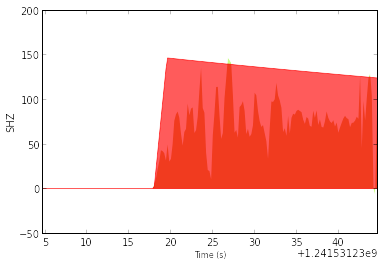

In [176]:
from sigvisa.plotting.plot import plot_with_fit_shapes
plot_with_fit_shapes(fname=None, wn=wn, axes=gca(), plot_wave=False, model_lw=0, ev_lw=0, plot_pred=True)
gca().set_xlim([current_atime-10, current_atime+30])